In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import  Conv2D , Dense , MaxPooling2D
from keras import Sequential

2023-07-20 18:21:46.123632: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from keras.layers import Flatten

In [3]:
import matplotlib.pyplot as plt

In [4]:
import cv2

In [5]:
image = cv2.imread("train/Cat/84.jpg")

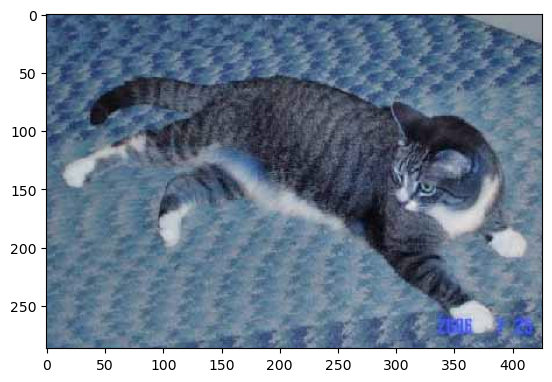

In [6]:
plt.imshow(image)

In [7]:
image.shape

(287, 426, 3)

In [10]:
train_ds=keras.utils.image_dataset_from_directory(
    directory="train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

test_ds=keras.utils.image_dataset_from_directory(
    directory="test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)



Found 204 files belonging to 2 classes.
Found 48 files belonging to 2 classes.


In [13]:
def preprocess(image , label):
    image = tf.cast(image/255. , tf.float32)
    return image , label

In [14]:
train_ds=train_ds.map(preprocess)
test_ds=test_ds.map(preprocess)


In [17]:
model=Sequential()

model.add(Conv2D(32 , kernel_size=(3,3) , padding="valid" , activation ="relu" , input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding="valid"))

model.add(Conv2D(64 , kernel_size=(3,3) , padding="valid" , activation ="relu"))
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding="valid"))

model.add(Conv2D(128 , kernel_size=(3,3) , padding="valid" , activation ="relu" ))
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding="valid"))

model.add(Flatten())

model.add(Dense(120 , activation="relu"))
model.add(Dense(60 , activation="relu"))

model.add(Dense(1 , activation="sigmoid"))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 128)     

In [19]:
model.compile(optimizer="adam" , loss="binary_crossentropy" , metrics =["accuracy"])

In [20]:
model.fit(train_ds , epochs=10 , validation_data=test_ds)

Epoch 1/10


2023-07-20 18:42:21.704607: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [204]
	 [[{{node Placeholder/_4}}]]
2023-07-20 18:42:21.705928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [204]
	 [[{{node Placeholder/_4}}]]


7/7 [==============================] - ETA: 0s - loss: 0.8359 - accuracy: 0.4951

2023-07-20 18:42:43.839177: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [48]
	 [[{{node Placeholder/_4}}]]
2023-07-20 18:42:43.839902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [48]
	 [[{{node Placeholder/_4}}]]


7/7 [==============================] - 26s 3s/step - loss: 0.8359 - accuracy: 0.4951 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 29s 4s/step - loss: 0.6987 - accuracy: 0.4559 - val_loss: 0.6909 - val_accuracy: 0.4792
Epoch 3/10
7/7 [==============================] - 18s 3s/step - loss: 0.6830 - accuracy: 0.5931 - val_loss: 0.7103 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 22s 3s/step - loss: 0.6653 - accuracy: 0.5931 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 22s 3s/step - loss: 0.5909 - accuracy: 0.7255 - val_loss: 0.6975 - val_accuracy: 0.4792
Epoch 6/10
7/7 [==============================] - 19s 3s/step - loss: 0.4614 - accuracy: 0.7892 - val_loss: 0.8128 - val_accuracy: 0.5417
Epoch 7/10
7/7 [==============================] - 23s 3s/step - loss: 0.3028 - accuracy: 0.9020 - val_loss: 0.8533 - val_accuracy: 0.5000
Epoch 8/10
7/7 [=============================

In [23]:
testimage1=cv2.imread("dogTest.jpg")
testimage1=cv2.resize(testimage1, (256,256))
testimage1_input=testimage1.reshape((1,256,256,3))

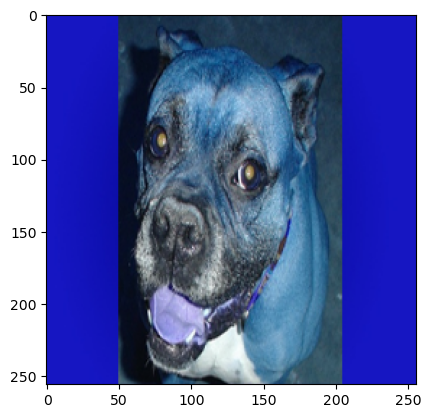

In [24]:
plt.imshow(testimage1)

In [27]:
testimage2=cv2.imread("catTest.jpg")
testimage2=cv2.resize(testimage2, (256,256))
testimage2_input=testimage2.reshape((1,256,256,3))

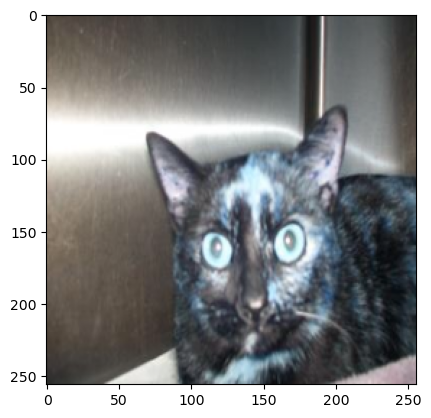

In [28]:
plt.imshow(testimage2)

In [32]:
print(model.predict(testimage1_input))
print(model.predict(testimage2_input))


1/1 [==============================] - 0s 46ms/step
[[1.]]
1/1 [==============================] - 0s 44ms/step
[[1.]]
